## House Price Prediction using Linear Regression

In [ ]:
# Importing the required libraries

# Data manipulation
import pandas as pd
# Numerical Calculation
import numpy as np # Numpy: Numerical Python
# Data visualization
import matplotlib.pyplot as plt # Pyplot: A module within matplotlib that provides a MATLAB like interface for plotting
%matplotlib inline
import seaborn as sns # Seaborn: A visualization library built over matplotlib to use it easily
# Machine Learning services
import sklearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarnings: Warnings about a module or package that cn change in future

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/Housing.csv') # df: DataFrame

In [ ]:
# Display first 5 rows of the dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Display last 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
# shape of dataframe
df.shape

(545, 13)

### Data Preprocessing

In [ ]:
# DataFrame general Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Checking duplicate rows
df.duplicated().sum() # Checks and counts number of duplicate rows

np.int64(0)

In [ ]:
df = df.drop_duplicates() # make sure if still there is duplicate rows, drop them

In [ ]:
# check missing values
df.isnull().sum() # checks and counts number of rows having missing values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.head(2) # Display first twoo rows of dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# DataFrame general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Converting all the attributes values into numbers, as we know that Machine Learning models works on numerical data

In [ ]:
# Converting some attributes of object data type i.e (mainroad, guestroom, basement, hotwateheating, airconditioning and prefarea) into category data type
object = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] # list of object data type attributes
for colname in object:
  df[colname] = df[colname].astype('category') # Select each of the above attribute in the dataframe and convert its type to 'category'

In [ ]:
# Now again dataframe info to make sure objects are converted to categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    object  
dtypes: category(6), int64(6), object(1)
memory usage: 33.9+ KB


In [ ]:
# Converting the last attribute i.e 'furnishingstatus' in a slight different way
df['furnishingstatus'].unique() # checking unique values in the attribute

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
# Converting data of "furnishsingstatus" column into numerical data type
furnishing_map = {'furnished': 1, 'semi-furnished': 2, 'unfurnished': 0}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_map).astype(int)

In [ ]:
df['furnishingstatus'].unique()

array([1, 2, 0])

In [ ]:
# Now converting all the values of category data type into numerical
# There are several ways to convert them i.e Lebel Encoding, One-Hot Encoding (using dummies) etc
# But here the best suitable way is Lebel Encoding so we will use this

# Columns in dataframe with data type category
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist() # Identify categorical columns and add them to a list
# will return as ['mainroad', 'guestroom', 'area', 'bedrooms', 'furnishingstatus']

binary_map = {'yes': 1, 'no': 0}

for col in cat_cols:
    df[col] = df[col].map(binary_map).astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1


### Now all the values in the dataframe are in numbers

<Axes: >

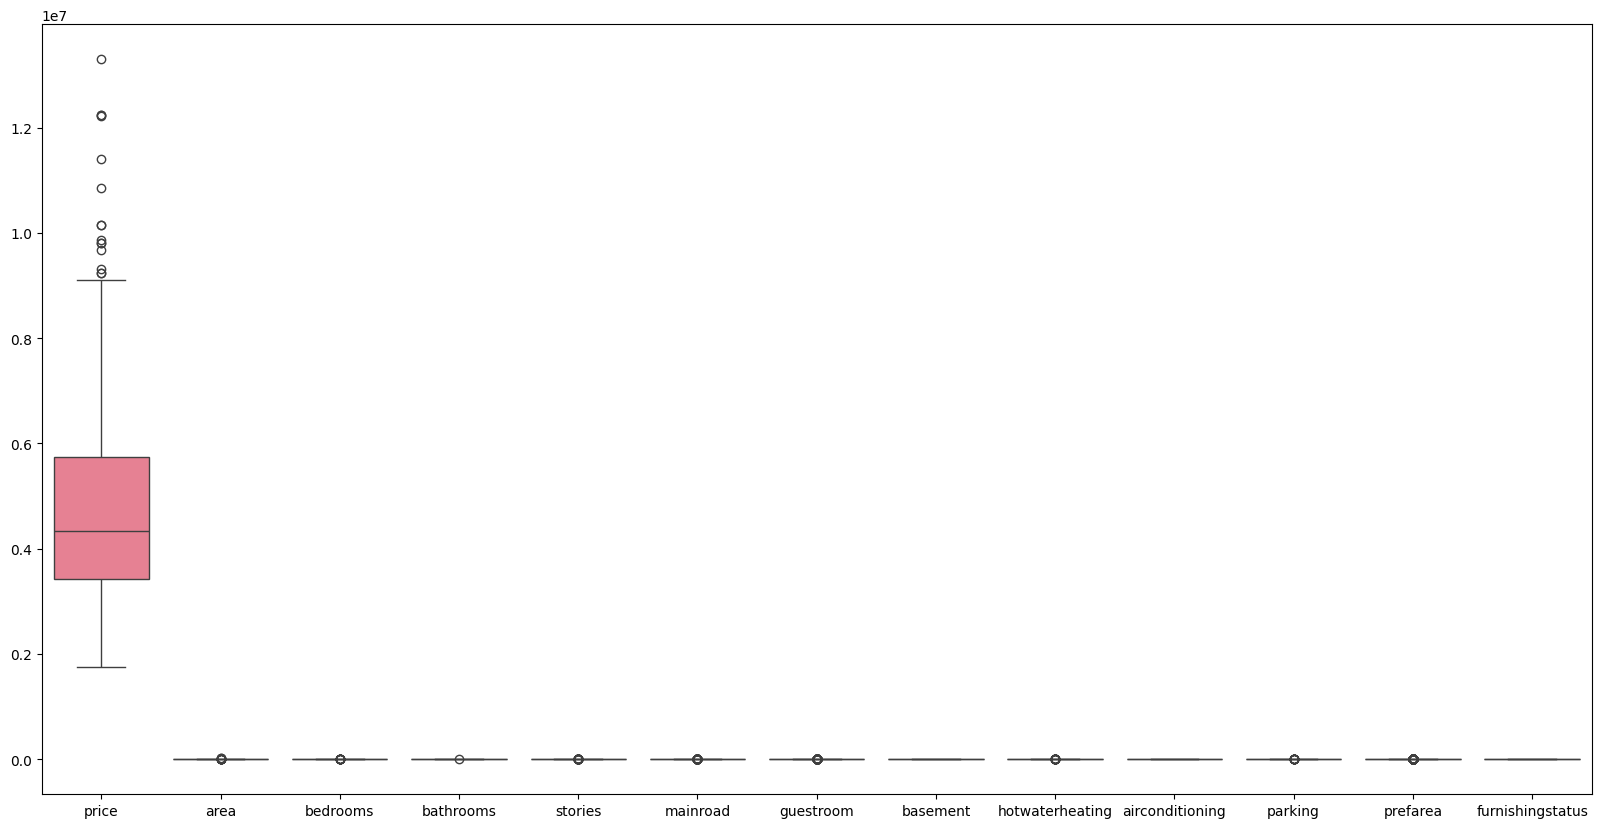

In [ ]:
# Finding outliers in the data
# we can easily detect outliers hsing boxplot (visualization)
plt.figure(figsize=(20,10)) # set figure size
sns.boxplot(df)

### Here we will handle outliers in the following steps

<Axes: ylabel='price'>

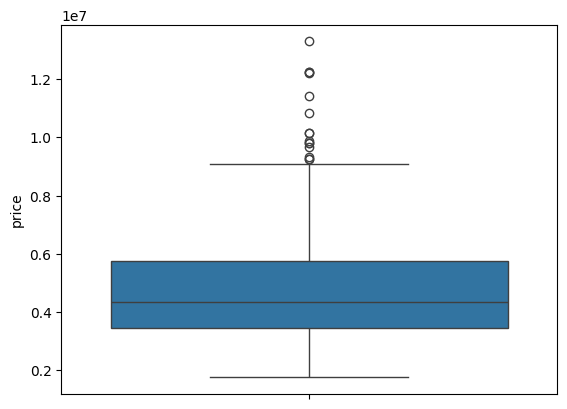

In [ ]:
# checking outliers in 'price' column
sns.boxplot(df['price'])

### First We should check it the distribution of data in column 'price' is symmetric distribution or skewed distribution.
### If the data is symmetrical, then we can use 'IQR' to handle the outliers, but if the data is skewed, then the best choice is to use other method "Log Trnasformation (log1p())" to handle outliers.

Text(0.5, 1.0, 'House Price Distribution')

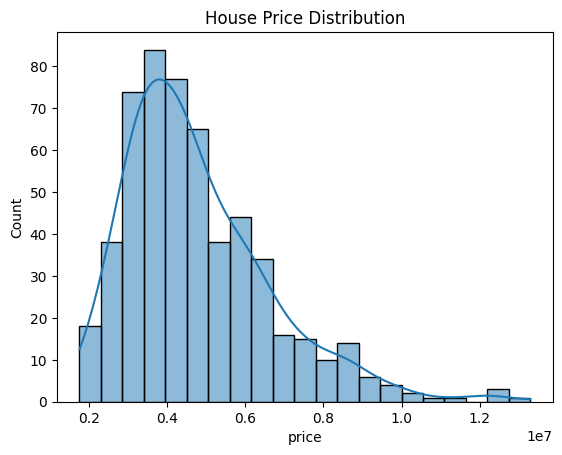

In [ ]:
# Visualizing the data distribution using seaborn
sns.histplot(df['price'], kde=True)
# Set a title to the graph
plt.title("House Price Distribution")

In [ ]:
# Checking skewness
# ( > 1 or < -1 ):          Highly skewed
# (0.5 to 1):               Moderately skewed
# ( -0.5 to 0.5 ):          Fairly symmetrical
skewness = df['price'].skew()
print("Skewness: ", skewness)

Skewness:  1.2122388370279802


### As from the above result, the data in column 'price' is highly skewed, so for linear regression instead of using IQR to handle Outliers, we will use "Log Trnasformation (log1p())" method on 'price' column to reduce skewness and compress the extream values.

In [ ]:
# Using "Log Trnasformation (log1p())" method on column 'price'
df['price'] = np.log1p(df['price']) # log(1 + price) is safe for 0s

In [ ]:
# Again checking skewness of the updated column 'price_log'
# ( > 1 or < -1 ):          Highly skewed
# (0.5 to 1):               Moderately skewed
# ( -0.5 to 0.5 ):          Fairly symmetrical
skewness_again = df['price'].skew()
print("Skewness: ", skewness_again)

Skewness:  0.14086281102108905


In [ ]:
df['price'].describe()

,price
count,545.000000
mean,15.306987
std,0.372165
min,14.375127
25%,15.048071
50%,15.283385
75%,15.562970
max,16.403275


Text(0.5, 1.0, 'House Price Distribution')

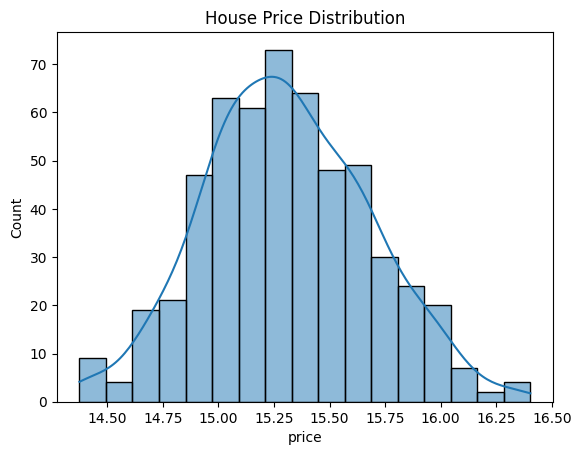

In [ ]:
# Visualizing the data distribution of the updated column 'price_log' using seaborn
sns.histplot(df['price'], kde=True) # kde=True allows the optimized thin line in the distribution graph
# Set a title to the graph
plt.title("House Price Distribution")

### Now from the above plot and 'skewness result= 0.14086281102108905' it is confirmed, that now the data in 'price' attribute is symmetrical

<Axes: ylabel='price'>

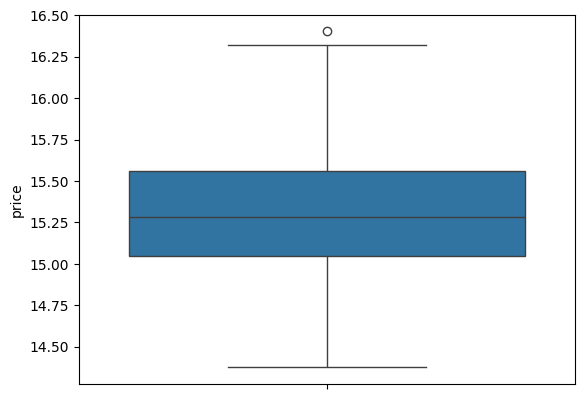

In [ ]:
# Now checking again outliers in column 'price'
sns.boxplot(df['price'])

### Now the outliers in the updated 'price' column have been reasonabaly handled

<Axes: >

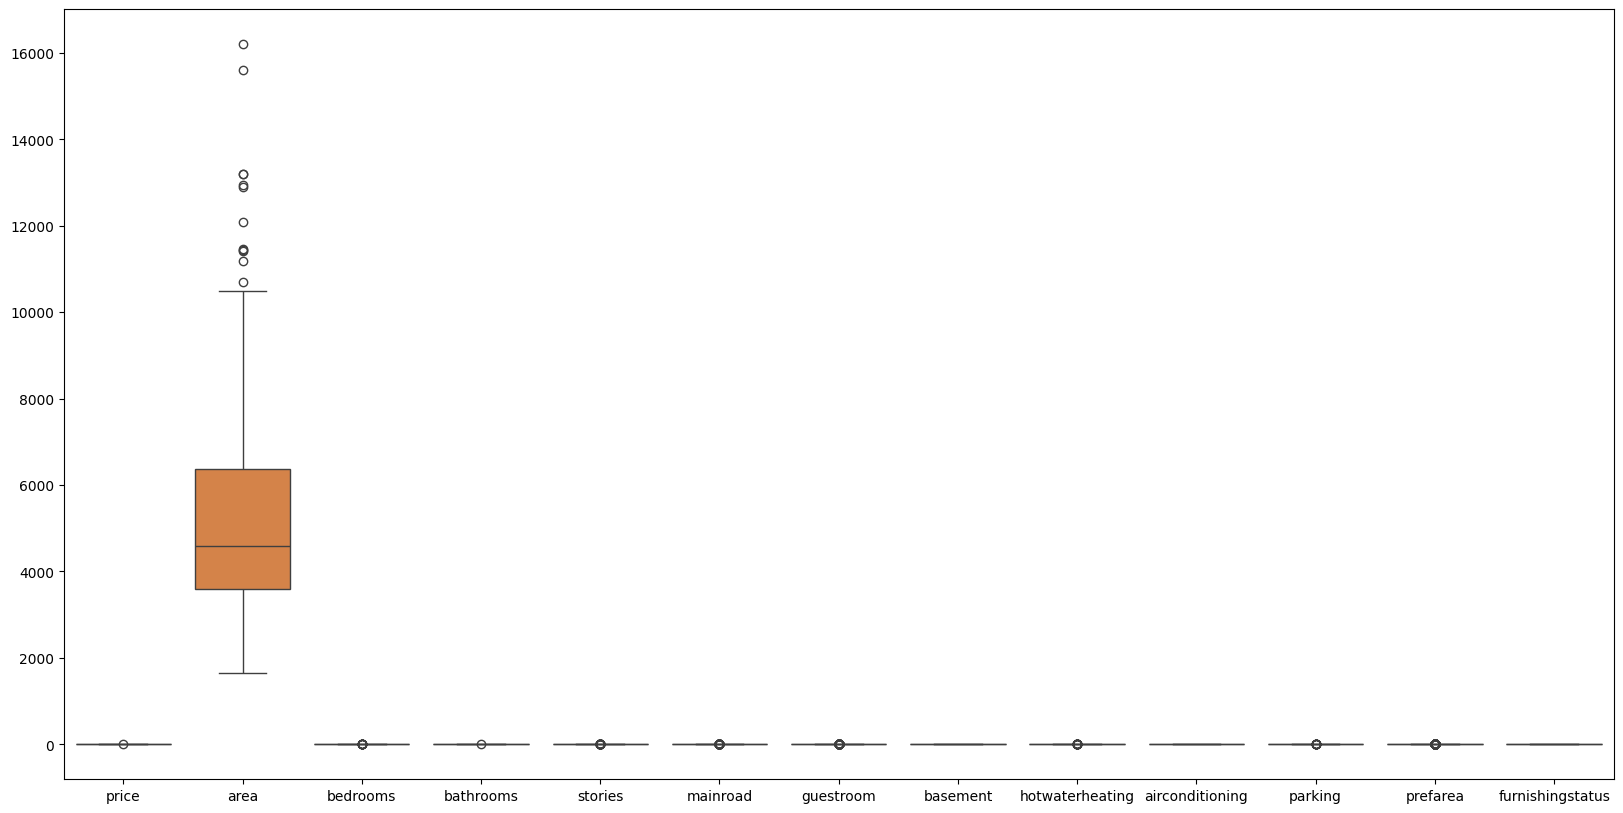

In [ ]:
# Now again checking outliers in all the attributes of the dataframe
plt.figure(figsize=(20,10)) # set figure size
sns.boxplot(df)

### Now same is the case for 'area', we will apply the above same method to handle outliers in 'area'.

Text(0.5, 1.0, 'House Price Distribution')

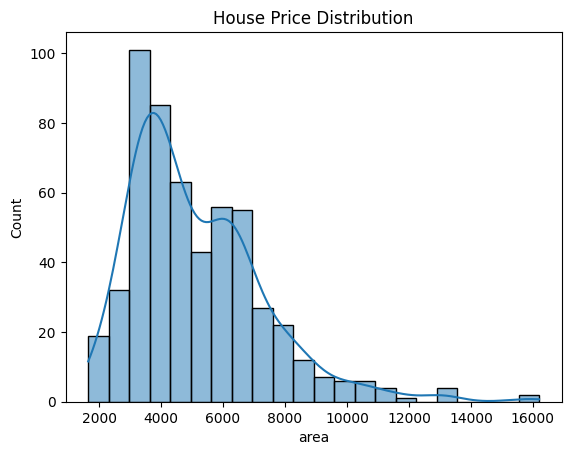

In [ ]:
# Visualizing the data distribution using seaborn
sns.histplot(df['area'], kde=True)
# Set a title to the graph
plt.title("House Price Distribution")

In [ ]:
# Checking skewness
# ( > 1 or < -1 ):          Highly skewed
# (0.5 to 1):               Moderately skewed
# ( -0.5 to 0.5 ):          Fairly symmetrical
skewness_area = df['area'].skew()
print("Skewness: ", skewness_area)

Skewness:  1.321188343153483


### Data in "area" attribute is also highly skewed, so here we will use "Log Transformation" method also

In [ ]:
# Using "Log Trnasformation (log1p())" method on column 'area'
df['area'] = np.log1p(df['area']) # log(1 + area) is safe for 0s

In [ ]:
# Checking skewness again
# ( > 1 or < -1 ):          Highly skewed
# (0.5 to 1):               Moderately skewed
# ( -0.5 to 0.5 ):          Fairly symmetrical
skewness_area_again = df['area'].skew()
print("Skewness: ", skewness_area_again)

Skewness:  0.13374740415416703


Text(0.5, 1.0, 'House Price Distribution')

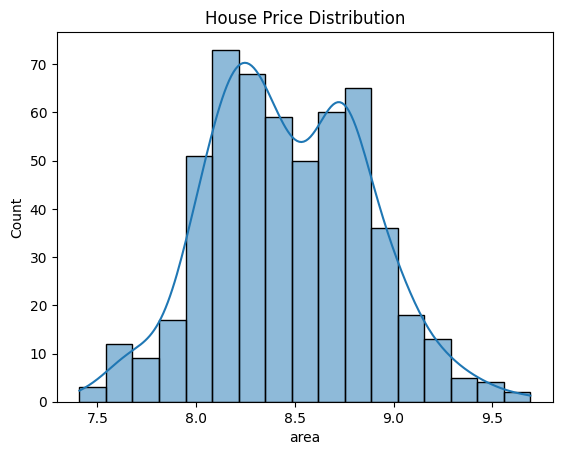

In [ ]:
# Visualizing the data distribution using seaborn
sns.histplot(df['area'], kde=True)
# Set a title to the graph
plt.title("House Price Distribution")

### Now data in 'area' attribute is also reasonabaly symmetric

<Axes: >

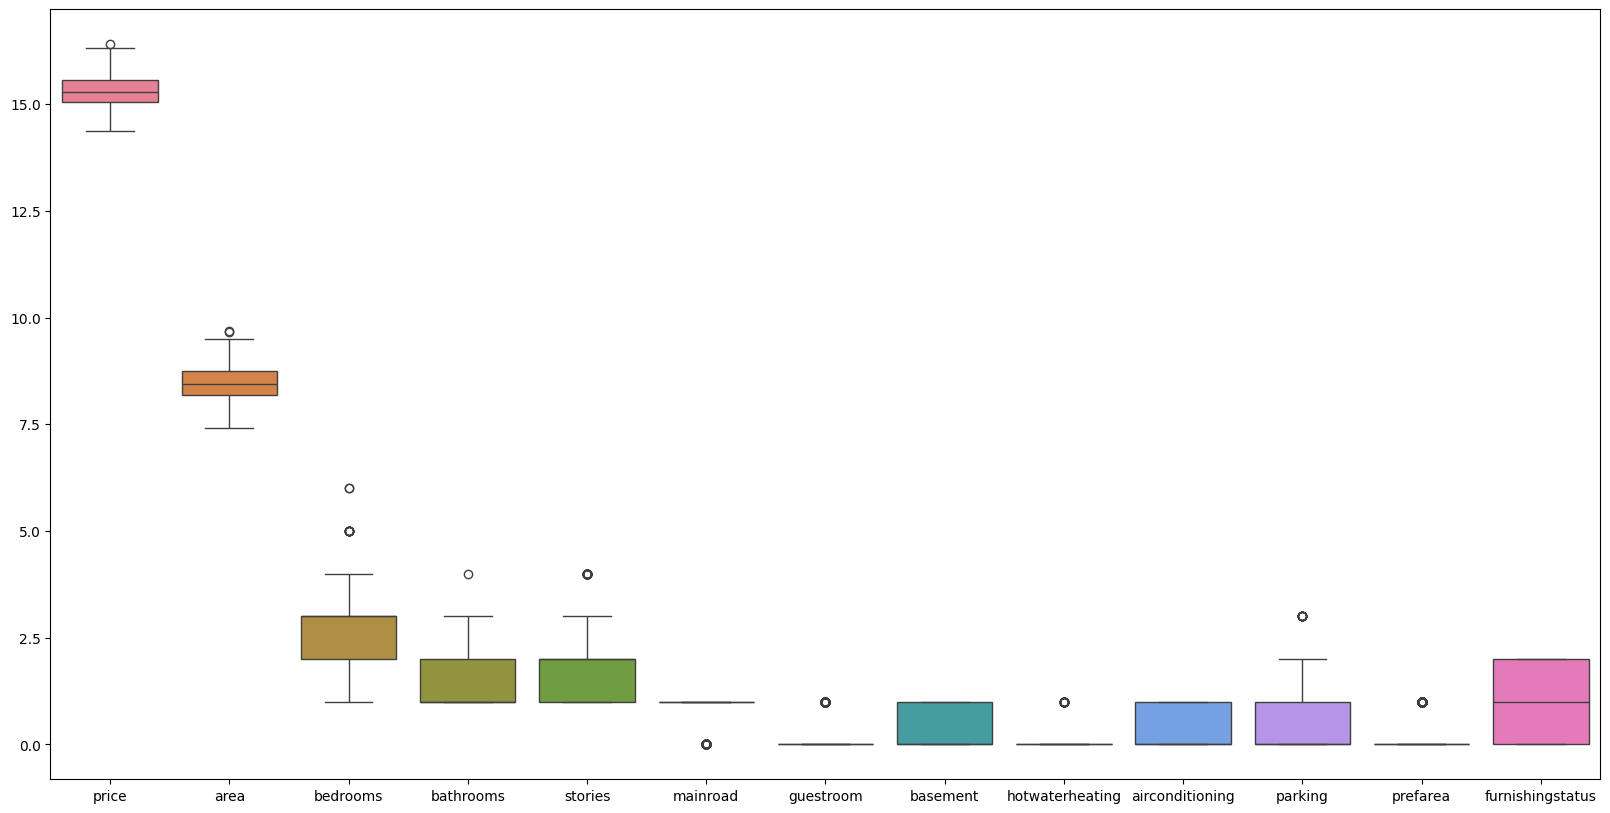

In [ ]:
# Now again checking outliers in all the attributes of the dataframe
plt.figure(figsize=(20,10)) # set figure size
sns.boxplot(df)

In [ ]:
df['bedrooms'].value_counts()

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


In [ ]:
df['bathrooms'].value_counts()

,count
bathrooms,
1,401
2,133
3,10
4,1


In [ ]:
df['stories'].value_counts()

,count
stories,
2,238
1,227
4,41
3,39


In [ ]:
df['mainroad'].value_counts()

,count
mainroad,
1,468
0,77


### Now most of the outliers in the dataframe are handled. The box plot shows some outliers in the categorical attributes "mainroad" guestroom" etc. But there are not any outliers here as it contain only the values (0,1). So we will ignore that.
### Because Boxplots automatically calculate outliers using IQR (interquartile range). But with categorical/binary variables, this statistical logic doesn’t make practical sense.

In [ ]:
# shape of dataframe
df.shape

(545, 13)

In [ ]:
df['area'].value_counts()

,count
area,
8.699681,24
8.006701,14
8.412055,13
8.294300,11
8.794976,9
...,...
8.119994,1
7.438972,1
8.202482,1


In [ ]:
# Now finding correlation between attributes
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.580085,0.369986,0.485715,0.415281,0.330041,0.277047,0.218401,0.088968,0.455159,0.371638,0.340557,0.253915
area,0.580085,1.000000,0.150463,0.202612,0.108145,0.331598,0.180186,0.043309,-0.013724,0.262420,0.360776,0.219716,0.091009
bedrooms,0.369986,0.150463,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.485715,0.202612,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.415281,0.108145,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.330041,0.331598,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.277047,0.180186,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.218401,0.043309,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.088968,-0.013724,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.455159,0.262420,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


<Axes: >

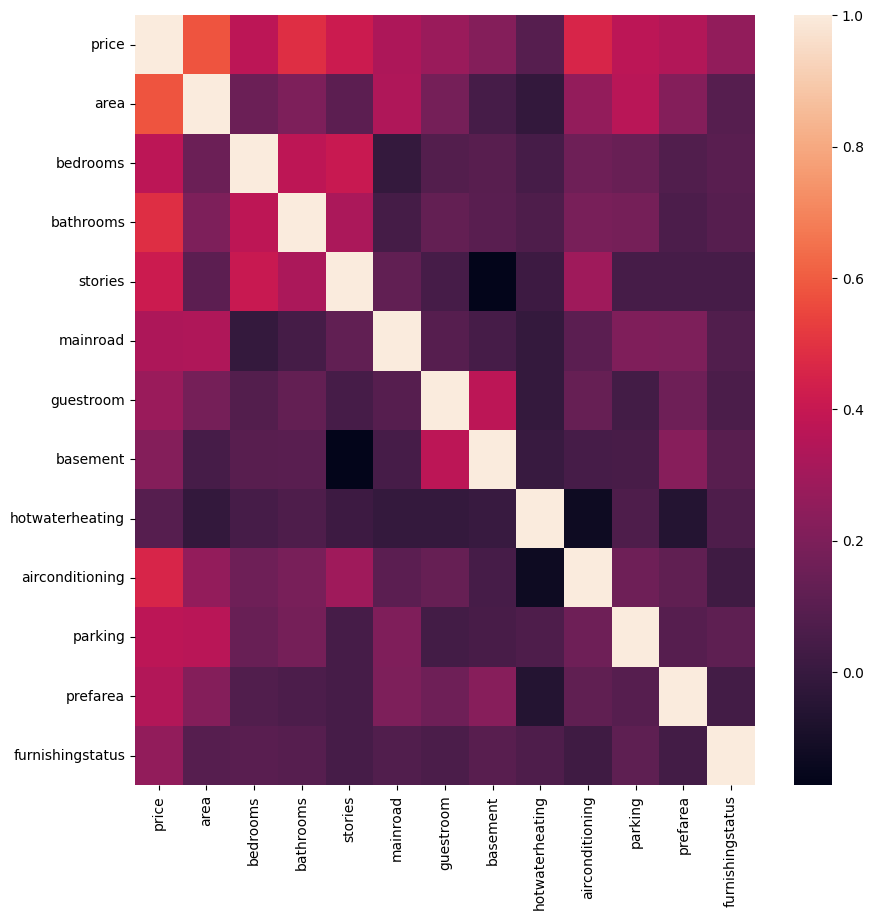

In [ ]:
# We can check correlation with heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

### Now seperating feature and target variables

In [ ]:
# Here the target variable is 'price'
x = df.drop('price', axis=1) # Contain all the attributes except 'price'
y = df['price'] # Contain only the target 'price'

In [ ]:
x.shape

(545, 12)

In [ ]:
y.shape

(545,)

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8.912069,4,2,3,1,0,0,0,1,2,1,1
1,9.100637,4,4,4,1,0,0,0,1,3,0,1
2,9.206433,3,2,2,1,0,1,0,0,2,1,2
3,8.922792,4,2,2,1,0,1,0,1,3,1,1
4,8.912069,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,8.006701,2,1,1,1,0,1,0,0,2,0,0
541,7.783641,3,1,1,0,0,0,0,0,0,0,2
542,8.194506,2,1,1,1,0,0,0,0,0,0,0
543,7.976252,3,1,1,0,0,0,0,0,0,0,1


In [ ]:
y

,price
0,16.403275
1,16.321037
2,16.321037
3,16.318175
4,16.250001
...,...
540,14.414348
541,14.384879
542,14.375127
543,14.375127


In [ ]:
# Now scaling the features i.e x using standard scaler
from sklearn.preprocessing import StandardScaler    # Import the scaler, i.e StandardScaler = (x-mean)/std
scaler = StandardScaler()                           # Iniatializing the scaler
x_scaled = scaler.fit_transform(x)                  # Fit to data and transform in one step

# .fit() Calculates and saves mean and std of X
# .transform() Applies scaling using calculate mean & std
# .fit_transform() Combines .fit() and .transform() in one step.

In [ ]:
x_scaled

array([[ 1.11933233,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113, -0.10486857],
       [ 1.59332341,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469, -0.10486857],
       [ 1.85925499,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113,  1.06152674],
       ...,
       [-0.68436035, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.27126387],
       [-1.23297007,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -0.10486857],
       [-0.52956414,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.27126387]])

In [ ]:
# Now splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42) # 80% traning data and 20% testing


In [ ]:
x_train.shape

(436, 12)

In [ ]:
x_test.shape

(109, 12)

In [ ]:
y_train.shape

(436,)

In [ ]:
y_test.shape

(109,)

### Now finally the data is ready to feed to the model

In [ ]:
# Importing model for linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # Initializing the model
lin_reg.fit(x_train, y_train) # Training the model

LinearRegression()

In [ ]:
# Making predictions from the trained model
y_pred = lin_reg.predict(x_test)

In [ ]:
print(y_pred)

[15.39127587 15.77366861 15.02085136 15.34079755 14.98359253 15.08888059
 15.43371119 15.62503013 14.83048404 14.77391509 16.27135618 14.91053483
 14.94860598 15.06118084 15.12827677 15.30582298 14.89880489 15.32850731
 15.27920739 15.13790354 15.54597115 15.6280071  14.88827974 15.32348759
 15.46979607 15.89579499 14.98576067 15.32013296 15.89288966 14.96755297
 15.70436361 14.9840179  15.65307095 15.27267017 15.09364033 15.53832837
 15.38718439 15.23346598 14.94875437 15.17153729 15.31458904 15.03770137
 15.77000338 15.12320688 15.17276295 15.21689317 15.75276971 15.22379986
 15.12244367 15.01188408 15.7877739  14.86652548 15.19938875 15.32243307
 15.1224793  14.79607867 15.84588794 14.87018511 15.2850784  14.90027908
 15.31758334 14.92523217 15.41841185 15.23924535 15.31479281 15.31231396
 15.8024985  15.0453727  15.54141237 15.59587039 15.2542958  15.48147347
 15.22246324 15.88896337 14.98455657 15.48275634 15.16746746 15.35818893
 15.29372909 15.20768453 15.85950644 15.20205142 15

In [ ]:
# Evaluating the model using different evaluation metrices
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 score: ", R2)

Mean Squared Error:  0.061855229032016575
Root Mean Squared Error:  0.24870711496058284
R2 score:  0.6796537139534149


### We can try to train other regression models like, dt_regressor, rf_regressor etc, but in this notebook, the preprocessing steps are specifically done for linear regression, so if we want to train other models, we can try it, but if the results are not good, then we have to preprocess the dataset in a slight different way.

### Now we will save and download the model and the used scaler to integrate it to its user interface

In [ ]:
# Saving the model, scaler and lebel encoder using joblit
import joblib
joblib.dump(lin_reg, 'lin_reg.pkl') # Saves model
joblib.dump(scaler, 'scaler.pkl')  # Saves scaler

['scaler.pkl']

In [ ]:
# Now downloading it
from google.colab import files
files.download('lin_reg.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>